## SNU PPSML - Machine Learning Exercise 4 (Note12)

#### **Contents**
---
* ML exercise 1: Gradient Descent [Optimization @ ML] (HW05)  

---
* ML exercise 2: Neural Network [Representation @ ML] (실습과제 11/5-8 & 11/9 강의)
    - 입력 속성데이터와 지도라벨값 $\{(x_i, y_i)\}$ @ 인코딩: 입력과 출력층의 설정  

    - 순전파 신경망(def feedforward())의 구성을 위한 여러가지 파라메터들     
        - $N_{layers}$ & $N_{nodes}$ in each layer
        - 가중치와 편향치 ($W$ & $B$)
        - 가중합(퍼셉트론 입력) : 
        
        > $a_j=W_{ji} f_i(a_i)$ (전층의 출력 $f_i$에 대한 가중합)
        
        - 활성화 함수(출력) : $f_j(a_j)$
        
        > $f(a)=\frac{1}{1+\exp^{-a}}$ for sigmoid  
        
        > $f(a)=\tanh(a)$ for tanh  
        
        > $f(a_k)=\frac{\exp[a_k]}{\sum_{k'}\exp[a_{k'}]}$ for softmax  
        
        > $f(a)=a$ for $ a > 0$ otherwise $0$ (ReLU)
        
        - 데이터의 순전파를 통한 최종 출력값 얻기: def feedforward(input_features)
        - ...
        
    - 오차보정의 역전파:  
    
        - 지도라벨값의 인코딩과 오차함수($E(w;x)$)의 정의
        - $\delta_j$ (가중합 $a_j$에 대한 오차보정항 $\equiv\frac{\partial E}{\partial a_j}$)
        - $\delta_j$를 통한 가중치보정 역전파의 구현: def backpropagate(target_label)
        - ...
        
    - 많은 데이터에 대한 학습 알고리즘 구현
    - check a contour of MLP's probability output for classification of 2D data  
    

---   
* ML exercise 3: Training a NN for Regression & Classification [Evaluation, Rep, Opt @ ML] (HW06-07, note09-10)
    - batch GD, mini-batch GD, stochastic GD [HW07]  
        - Visualize the minimizers in 2D
    - Validation of model, Over-fitting, Bias & Variance**  
        - Visualize an over-fitted status [note09]
    - Evaluation of model performance
        - error(loss), accuracy (...) --> learning curve [HW06]
        - NN score & ROC(Receiver Operating Characteristic) curve [note09, HW06]
    - Training a NN for Regression [note10]
    
    

---   
* **ML exercise 4: Your NNfactory VS Famous Deep Learning Platforms ** (note11,12)

    - easy-to-use Deep Learning API with easy-to-implement Neural Network frame 
        - Keras with Tensorflow-backend (or Tensorflow with Keras API)  
            [\[github\]](https://github.com/keras-team/keras)  
            [\[doc\]](https://keras.io/)
        - Tensorflow  
            [\[main\]](https://www.tensorflow.org/)  
            [\[github\]](https://github.com/tensorflow/tensorflow)  
        - PyTorch  
            [\[main\]](https://pytorch.org/) 
      
    - Data Manipulation and Analysis Tool
        - pandas DataFrame
            [\[doc\]](https://pandas.pydata.org/)  
      
    - Regression using Keras (on Tensorflow-backend) VS NNfactory [note11]  
    
    - **Classification using Keras VS NNfactory [note12]**
  
  

In [0]:
# Printing all outputs in a cell (not only the last output)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Let's start the ML exercise 4-2 !

----------------
### **4.1 Installation of TensorFlow and Keras**

In [0]:
# TensorFlow
#sudo python3 -m pip install tensorflow  # <= for using cpu

# Keras 
#sudo python3 -m pip install keras

# Pandas
#sudo python3 -m pip install pandas

---
### **4.3 Classification using Keras(on TensorFlow-backend) VS NNfactory** 

   - Keras를 활용하여 note07 및 09에서 구현한 2종 분류 신경망을 재구현해보고 학습곡선 및 ROC Curve를 그려보자.
   - 각자 구현한 신경망 클래스를 활용한 회귀 신경망의 결과와 비교해보자.
   

---
* 훈련 & 테스트 데이터의 로딩 그리고 시각화

In [0]:
import numpy as np
data_np_circles = np.load('data/2Classes_2d_circles.npy')
data_np_moons = np.load('data/2Classes_2d_moons.npy')
data_np_spirals = np.load('data/2Classes_2d_spirals.npy')
print (len(data_np_circles))
print (len(data_np_moons))
print (len(data_np_spirals))

10000
10000
20000


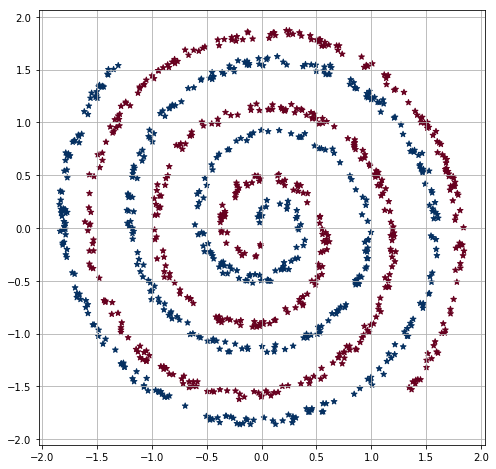

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice
%matplotlib inline

# data = data_np_circles
data = data_np_spirals[:1000]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm, marker='*')

ax.grid(True)

plt.show()

- 데이터에 one-hot encoded column을 추가하고, 훈련데이터와 테스트데이터를 나누기


In [0]:
# 케라스 신경망 모형을 위한 데이터 정의 
data_keras = data_np_spirals

# one-hot encoded label column을 정의
Y_onehot = np.zeros((len(data_keras),2))

for i, y_onehot in enumerate(Y_onehot):
    Y_onehot[i, int(data_keras[i,0])] = 1

# one-hot encoded label column을 기존의 데이터에 추가
data_keras = np.c_[data_keras,Y_onehot]

# 훈련데이터와 테스트데이터를 정의
n_data_train = 5000
n_data_test = 1000

data_keras_train = data_keras[:n_data_train]
data_keras_test = data_keras[-n_data_test:]

In [0]:
data_keras_train[:,3:].shape

(5000, 2)

In [0]:
# ==================================
# Keras를 활용한 신경망 모형의 정의 및 학습
# ==================================

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras import optimizers
from keras import losses

# MLP/Fully-connected Feed-forward Neural Network(완전연결앞먹임) 신경망 모형의 인스턴스 선언
model = Sequential() 

# 신경망 모형 인스턴스에 n_node개의 노드를 가진 은닉층을 하나씩 추가 
n_node_input=2
n_node_hidden=100
n_node_output=2
act_func='relu'
w_init='uniform' #' he_normal' # 'uniform' / 'glorot_uniform' ~ 'xavier initialization' / 'he_normal' for 'relu'

## 첫번째 은닉층 (input_dim=입력층 노드수)
model.add(Dense(n_node_hidden, input_dim=n_node_input, activation=act_func, kernel_initializer=w_init))
## 두번째 은닉층
model.add(Dense(n_node_hidden, activation=act_func, kernel_initializer=w_init))
## 출력층
model.add(Dense(n_node_output, activation='softmax'))

## 에러함수 정의
myloss = 'mse' #'mse' # losses.MSE  #'mse' # Mean squared error type
## 성능평가를 위한 지표설정 ('accuracy':정확도)
mymetric = 'accuracy'
## 가중치 최적화 알고리즘과 함께 (GD 기반의 알고리즘에서) 사용될 (초기) 학습률을 정의
learning_rate=0.001
## 가중치 최적화 알고리즘의 설정
myoptimizer = optimizers.Adam(lr=learning_rate) #sgd(lr=learning_rate) # .Adam(lr=learning_rate) # .sgd(lr=learning_rate) (stochastic GD)

## 정의한 신경망 모형의 확인
model.summary()

## 학습 알고리즘의 정의
model.compile(optimizer=myoptimizer, loss=myloss, metrics=[mymetric])

# * 실제 가중치의 학습
# =================
# 1) data_train의 속성값-data_train[:,1]과 라벨-data_train[:,0]을 훈련데이터로 활용
# 2) data_test의 속성값과 라벨을 validation data로 사용
# 3) batch_size: 가중치 업데이트마다 사용할 샘플 데이터의 수
# 4) epochs: 총 학습주기수
# 5) verbose: 학습과정출력모드 설정
hist = model.fit(data_keras_train[:,1:3],data_keras_train[:,3:], epochs=100, batch_size=1, validation_data=(data_keras_test[:,1:3],data_keras_test[:,3:]), verbose=1)

# * Signature: model.fit(x, y, batch_size=32, epochs=10, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, **kwargs)
# * Docstring:
# * Trains the model for a fixed number of epochs.

# * Arguments
#     x: input data, as a Numpy array or list of Numpy arrays
#         (if the model has multiple inputs).
#     y: labels, as a Numpy array.
#     batch_size: integer. Number of samples per gradient update.
#     epochs: integer, the number of epochs to train the model.
#     verbose: 0 for no logging to stdout,
#         1 for progress bar logging, 2 for one log line per epoch.
#     callbacks: list of `keras.callbacks.Callback` instances.
#         List of callbacks to apply during training.
#         See [callbacks](/callbacks).
#     validation_split: float (0. < x < 1).
#         Fraction of the data to use as held-out validation data.
#     validation_data: tuple (x_val, y_val) or tuple
#         (x_val, y_val, val_sample_weights) to be used as held-out
#         validation data. Will override validation_split.
#     shuffle: boolean or str (for 'batch').
#         Whether to shuffle the samples at each epoch.
#         'batch' is a special option for dealing with the
#         limitations of HDF5 data; it shuffles in batch-sized chunks.
#     class_weight: dictionary mapping classes to a weight value,
#         used for scaling the loss function (during training only).
#     sample_weight: Numpy array of weights for
#         the training samples, used for scaling the loss function
#         (during training only). You can either pass a flat (1D)
#         Numpy array with the same length as the input samples
#         (1:1 mapping between weights and samples),
#         or in the case of temporal data,
#         you can pass a 2D array with shape (samples, sequence_length),
#         to apply a different weight to every timestep of every sample.
#         In this case you should make sure to specify
#         sample_weight_mode="temporal" in compile().
#     initial_epoch: epoch at which to start training
#         (useful for resuming a previous training run)

# # Returns
#     A `History` object. Its `History.history` attribute is
#     a record of training loss values and metrics values
#     at successive epochs, as well as validation loss values
#     and validation metrics values (if applicable).

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 202       
Total params: 10,602
Trainable params: 10,602
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 19000 samples
Epoch 1/100
5000/5000 [==============================] - 12s - loss: 0.2456 - acc: 0.5646 - val_loss: 0.2438 - val_acc: 0.5538
Epoch 2/100
5000/5000 [==============================] - 12s - loss: 0.2422 - acc: 0.5708 - val_loss: 0.2431 - val_acc: 0.5431
Epoch 3/100
5000/5000 [==============================] - 12s - loss: 0.2386 - acc: 0.5664 - val_los

Text(0.5, 1.0, 'Learning Curve')

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

Text(0, 0.5, 'accuracy')

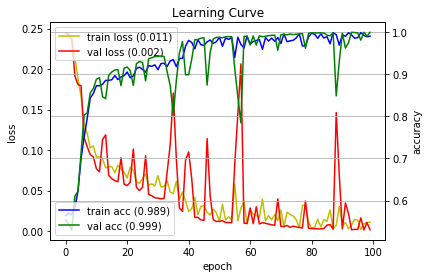

In [0]:
#=====================
# Learning Curve Plot
#=====================
# %matplotlib inline
import matplotlib
# matplotlib.use('Agg') 
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
# accuracy를 평가의 지표로 사용할 경우를 위하여, 오른쪽의 y-axis를 예약 
acc_ax = loss_ax.twinx()

# 위 model.fit의 return을 담고 있는 hist객체는, 학습과정의 history를 가지고 있다.
loss_ax.plot(hist.history['loss'], 'y', label='train loss (%5.3f)'%(hist.history['loss'][-1]))                        
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss (%5.3f)'%(hist.history['val_loss'][-1]))                                                                                                            

loss_ax.set_title("Learning Curve")
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

# accuracy가 평가의 지표로 사용
acc_ax.plot(hist.history['acc'], 'b', label='train acc (%5.3f)'%(hist.history['acc'][-1]))                    
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc (%5.3f)'%(hist.history['val_acc'][-1]))                                                                                    
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
acc_ax.grid(True)

fig.savefig('./LC_spirals_adam.png', dpi=fig.dpi, bbox_inches='tight')
# fig.savefig('./LC_spirals_sgd.png', dpi=fig.dpi, bbox_inches='tight')
                                                                                                                      

---
* 훈련한 Keras 모형의 저장

훈련된 모형은 Keras의 save메소드를 사용하여 .h5파일로 [\[hdf 포맷\]](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) 저장할 수 있다.

In [0]:
# ============
#  Model Save
# ============
run_tag = 'spirals_adam'
model.save('./keras_model_'+run_tag+'.h5')
model.save_weights('./keras_model_'+run_tag+'_weights.yaml')

---
* 저장된 Keras 모형 불러오기 :

저장된 .h5 파일로부터 훈련된 상태의 신경망 모형의 다시 로드하여 예측에 사용하거나, 추가적인 학습/훈련에 사용할 수 있다. 

In [0]:
# ============
#  Model Load
# ============
from keras.models import load_model

saved_model = './keras_model_'+run_tag+'.h5'
model_load = load_model(saved_model)


---
* Keras에서 학습한 분류 모형을 시각화해보자

In [0]:
a = np.array([0.,0.])
a.shape
model_load.predict(np.array([0.,0.]).reshape(1,2))


(2,)

array([[ 0.36491811,  0.63508195]], dtype=float32)

x_mesh.shape  =  (100, 100)
y_mesh.shape  =  (100, 100)
P_mesh.shape  =  (100, 100)


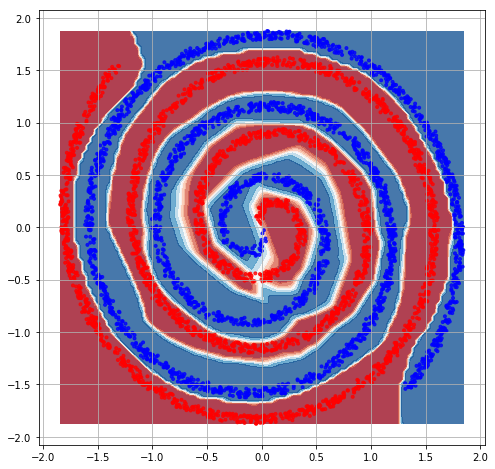

In [0]:
# ==================================== #
# * Plotting Keras model prediction contour 
# ==================================== #
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice


# 데이터 로드 & 저장파일이름설정
data = data_np_spirals[:n_data_train]
savefigfile = 'plot_spirals_trained_well_done_keras.png'


# 등고선 플랏을 위한 그리드 설정
x_min, x_max = data[:,1].min(), data[:,1].max()
y_min, y_max = data[:,2].min(), data[:,2].max()
n_x = 100
n_y = 100
x = np.linspace(x_min, x_max, n_x)
y = np.linspace(y_min, y_max, n_y)
X, Y = np.meshgrid(x, y)

# 각 (X[j,i],Y[j,i]) 위치에서의 신경망 출력(~첫번째 클래스일 확률)을 담을 배열 설정
P = np.zeros(n_x*n_y).reshape(n_y,n_x)


for j in range(n_y):
    for i in range(n_x):    
#         P[j,i] = mynn_load.feedforward([X[j,i],Y[j,i]])[0]
        P[j,i] = model_load.predict(np.array([X[j,i],Y[j,i]]).reshape(1,2))[0][0]


print('x_mesh.shape  = ',X.shape)
print('y_mesh.shape  = ',Y.shape)
print('P_mesh.shape  = ',P.shape)


# 신경망이 학습한 확률모형의 등고선을 데이터와 함께 시각화
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

ax.contourf(X, Y, P, cmap=cm, alpha=.8)
ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm_bright, alpha=0.8, marker='.')

ax.grid(True)
fig.savefig(savefigfile)

plt.show()

----
### Cross check using NNfactory

In [0]:
%reload_ext autoreload
%autoreload 2

import NNfactory

In [0]:
model_str = '2:identity|'+4*'100:relu|'+'2:softmax'
lr = 0.001
name_tag = 'classifier_lr'+str(lr)

In [0]:
mynn = NNfactory.MLP(model_structure=model_str, \
                     model_nametag=name_tag, \
                     learning_rate=lr, \
                     encoding='one-hot')


 * 다음과 같은 구조의 다층퍼셉트론 연결이 초기화 되었습니다 *

 > 모델이름 = classifier_lr0.001
 > 총 층수 (입력 + 은닉(s) + 출력) =  6
 > 각 층에서의 노드수 =  [2, 100, 100, 100, 100, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'relu', 'relu', 'relu', 'softmax']
 > 학습률(Learning Rate) =  0.001
 > 지도라벨 인코딩 방식 =  one-hot


In [0]:
# 훈련 준비
data_type=None #mnist' # None
encoding='one-hot' #'one-hot' #'integer' # 'float'

# NNfactory 신경망 모형을 위한 데이터 정의 
data_mynn = data_np_spirals

# 훈련데이터와 테스트데이터를 정의
n_data_train = 5000
n_data_test = 1000

data_mynn_train = data_mynn[:n_data_train]
data_mynn_test = data_mynn[n_data_test:]

# 최대학습주기 설정
epochs = 100

In [0]:
# 설정된 최대학습주기동안 훈련

for e in range(epochs):
    
    id_data = 0
    
    for data in data_mynn_train:
        
        # 프로세스 게이지
        id_data += 1
        
        # 입력/지도 데이터 가공 
        if data_type == 'mnist':
            # split the mnist data by the ',' commas
            all_list = data.split(',')
            # 입력 속성 데이터 스케일링 (preprocessing)
            input_list = np.asfarray(all_list[1:])/255.0
            # 지도 라벨 벡터 가공 (shape = (10,))
            target_list = np.zeros(10) #mynn.n_nodes[-1])
            # all_values[0] is the target label for this data
            target_list[int(all_list[0])] = 1.0
            
        else:
        
            input_list = data[1:] #np.asfarray(all_values[1:])        
            target_origin = data[0]
            
            if encoding == 'one-hot':

                target_list = np.zeros(mynn.n_nodes[-1])
                target_list[int(data[0])] = 1
    
            elif encoding == 'integer':
                
                target_list = np.zeros(1)
                target_list[0] = int(data[0])

            elif encoding == 'float':
                
                target_list = np.zeros(1)
                target_list[0] = data[0]
                
            else:
                raise ValueError(' => check your encoding scheme. ')
              
        mynn.train(input_list, target_list)
        
        pass

    if (e%1==0):
        print (' --------------------------------------')
        print(' * epoch = {}'.format(e+1))
        print(' > 훈련 샘플에 대한 성능 (정확도 & 평균에러) ')
        mynn.check_accuracy_error(data_mynn_train, 0, n_data_train-1, data_type=None)
        print('')
        print(' > 테스트 샘플에 대한 성능 (정확도 & 평균에러) ')
        mynn.check_accuracy_error(data_mynn_test, 0, n_data_test-1, data_type=None)
    
    
    pass

 --------------------------------------
 * epoch = 1
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.6132  | (정답수)/(테스트 데이터수) =  3066 / 5000
 * 현재 평균에러 =  0.233208261002

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.614  | (정답수)/(테스트 데이터수) =  614 / 1000
 * 현재 평균에러 =  0.231987883492
 --------------------------------------
 * epoch = 3
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.627  | (정답수)/(테스트 데이터수) =  3135 / 5000
 * 현재 평균에러 =  0.227437824125

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.627  | (정답수)/(테스트 데이터수) =  627 / 1000
 * 현재 평균에러 =  0.227308989912
 --------------------------------------
 * epoch = 5
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.6332  | (정답수)/(테스트 데이터수) =  3166 / 5000
 * 현재 평균에러 =  0.223493784391

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.624  | (정답수)/(테스트 데이터수) =  624 / 1000
 * 현재 평균에러 =  0.223649596291
 --------------------------------------
 * epoch = 7
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.6506  | (정답수)/(테스트 데이터수) =  3253 / 5000

---
* 훈련한 모형의 저장

훈련된 모형은 NNfactory클래스 안의 save_model메소드를 사용하여 .npy포맷의 numpy array로 저장할 수 있다.

In [0]:
mynn.save_model(fname='mlp_spirals_4relu_well_done_nnfactory.npy', nametag='')


---
* 저장된 모형 불러오기 :

저장된 .npy파일로부터 신경망정보가 담긴 넘파이 배열을 직접 로드하고, 이 넘파이 배열을 새 신경망 인스턴스 생성에 사용하여 저장된 모형과 똑같은 신경망을 로드한다.

In [0]:
mynn_npy = np.load('mlp_spirals_4relu_well_done_nnfactory.npy')
mynn_load = NNfactory.MLP(load_model_np=mynn_npy)


 * 다음과 같은 구조의 다층퍼셉트론 모형이 "load_model_np" 정보로부터 로드되었습니다. *

 > 모델이름 = 
 > 총 층수 (입력 + 은닉(s) + 출력) =  6
 > 각 층에서의 노드수 =  [2, 100, 100, 100, 100, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'relu', 'relu', 'relu', 'softmax']
 > 학습률(Learning Rate) =  0.001
 > 지도라벨 인코딩 방식 =  one-hot


-----
*  NNfactory 분류 모형을 시각화해보기

In [0]:
# ============================================== #
# * Plotting NNfactory model prediction contour 
# ============================================== #
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice


# 데이터 로드 & 저장파일이름설정
data = data_np_spirals[:n_data_train]
savefigfile = 'plot_spirals_trained_well_done_mynn.png'


# 등고선 플랏을 위한 그리드 설정
x_min, x_max = data[:,1].min(), data[:,1].max()
y_min, y_max = data[:,2].min(), data[:,2].max()
n_x = 100
n_y = 100
x = np.linspace(x_min, x_max, n_x)
y = np.linspace(y_min, y_max, n_y)
X, Y = np.meshgrid(x, y)

# 각 (X[j,i],Y[j,i]) 위치에서의 신경망 출력(~첫번째 클래스일 확률)을 담을 배열 설정
P = np.zeros(n_x*n_y).reshape(n_y,n_x)

for j in range(n_y):
    for i in range(n_x):    
        P[j,i] = mynn_load.feedforward([X[j,i],Y[j,i]])[0]
    
print('x_mesh.shape  = ',X.shape)
print('y_mesh.shape  = ',Y.shape)
print('P_mesh.shape  = ',P.shape)


# 신경망이 학습한 확률모형의 등고선을 데이터와 함께 시각화
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

ax.contourf(X, Y, P, cmap=cm, alpha=.8)
ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm_bright, alpha=0.8, marker='.')

ax.grid(True)
fig.savefig(savefigfile)

plt.show()